In [26]:
!pip install tf-nightly

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\users\\kmj\\pycharmprojects\\pythonproject\\venv\\lib\\site-packages\\~5py\\defs.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\kmj\pycharmprojects\pythonproject\venv\scripts\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
from glob import glob

In [2]:
path = "./kf"
for path, dirs, files in os.walk(path):
    for i in files:
        if i.endswith(".jpg"):
            pass
        else:
            os.remove(os.path.join(path,i))

In [3]:
image_count = len(list(glob('./kf/*/*.jpg')))
print(image_count)

147834


In [4]:
path = "./kf"
lis = []
for data_dir, dirs, files in os.walk(path):
    for i in files:
        lis.append(i)
print(len(lis))

147834


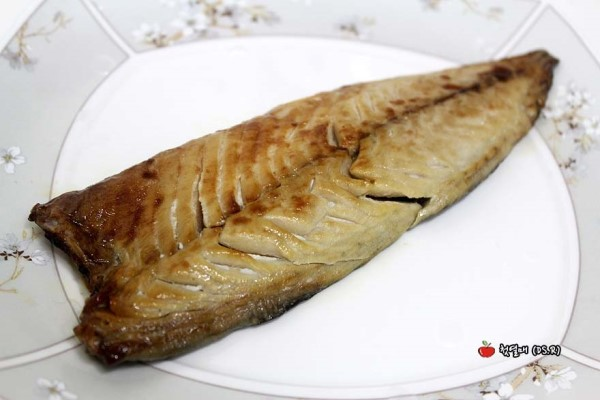

In [5]:
fish = list(glob('./kf/고등어구이/*'))
PIL.Image.open(str(fish[1]))

In [5]:
batch_size = 1000
img_height = 180
img_width = 180

In [6]:
path = "./kf"
data_dir = str(path)

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 147834 files belonging to 150 classes.
Using 118268 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 147834 files belonging to 150 classes.
Using 29566 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['가지볶음', '간장게장', '갈비구이', '갈비찜', '갈비탕', '갈치구이', '갈치조림', '감자전', '감자조림', '감자채볶음', '감자탕', '갓김치', '건새우볶음', '경단', '계란국', '계란말이', '계란찜', '계란후라이', '고등어구이', '고등어조림', '고사리나물', '고추장진미채볶음', '고추튀김', '곱창구이', '곱창전골', '과메기', '김밥', '김치볶음밥', '김치전', '김치찌개', '김치찜', '깍두기', '깻잎장아찌', '꼬막찜', '꽁치조림', '꽈리고추무침', '꿀떡', '나박김치', '누룽지', '닭갈비', '닭계장', '닭볶음탕', '더덕구이', '도라지무침', '도토리묵', '동그랑땡', '동태찌개', '된장찌개', '두부김치', '두부조림', '땅콩조림', '떡갈비', '떡꼬치', '떡만두국', '떡볶이', '라면', '라볶이', '막국수', '만두', '매운탕', '멍게', '메추리알장조림', '멸치볶음', '무국', '무생채', '물냉면', '물회', '미역국', '미역줄기볶음', '배추김치', '백김치', '보쌈', '부추김치', '북엇국', '불고기', '비빔냉면', '비빔밥', '산낙지', '삼겹살', '삼계탕', '새우볶음밥', '새우튀김', '생선전', '설렁탕', '소세지볶음', '송편', '수육', '수정과', '수제비', '숙주나물', '순대', '순두부찌개', '시금치나물', '시래기국', '식혜', '알밥', '애호박볶음', '약과', '약식', '양념게장', '양념치킨', '어묵볶음', '연근조림', '열무국수', '열무김치', '오이소박이', '오징어채볶음', '오징어튀김', '우엉조림', '유부초밥', '육개장', '육회', '잔치국수', '잡곡밥', '잡채', '장어구이', '장조림', '전복죽', '젓갈', '제육볶음', '조개구이', '조기구이', '족발', '주꾸미볶음', '주먹밥', '짜장면', '짬뽕', '쫄면', '찜닭', '총각김치', '추어탕', '칼국수', '코

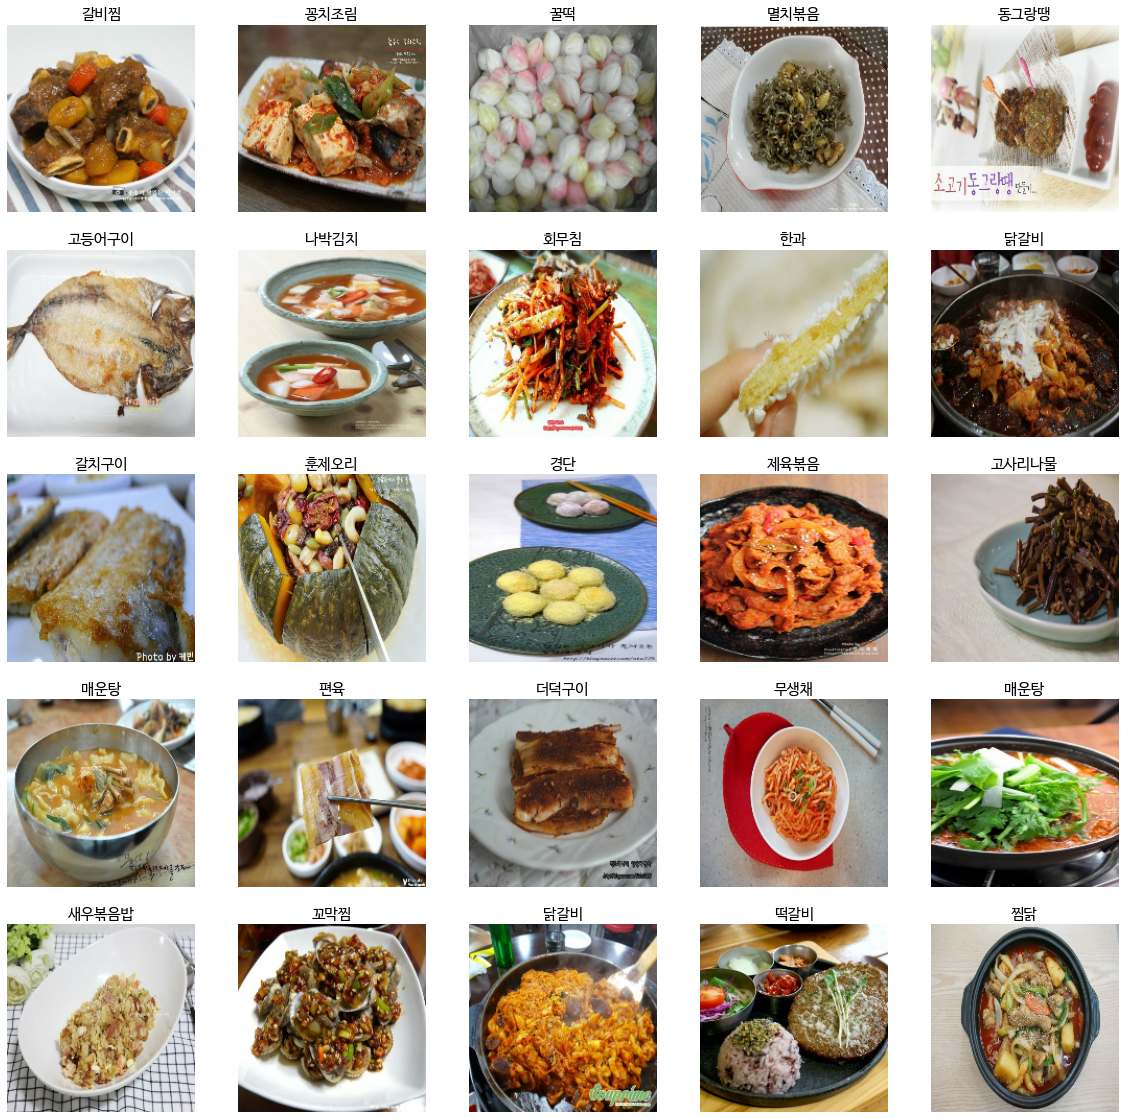

In [10]:
import matplotlib.font_manager as fm

path = "./NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname=path, size=15)

plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]], fontproperties=fontprop)
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(1000, 180, 180, 3)
(1000,)


In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch = list(normalized_ds)[0][0]
labels_batch = list(normalized_ds)[0][1]
first_image = image_batch[15]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

InvalidArgumentError: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext]

In [ ]:
num_classes = 150

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [60]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs = 2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
new_url = "https://recipe1.ezmember.co.kr/cache/recipe/2018/02/10/a9e93c1f2dc682239fc7e156c121fb6a1.jpg"
path = "./kft/test_image.jpg"
import urllib.request as req
req.urlretrieve(new_url, path)

img = keras.preprocessing.image.load_img(
    path, target_size=(img_height, img_width)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "예측값: {}(정확도 {:.2f}%)"
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)